In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import great_circle
import time
import math
%matplotlib inline

In [121]:
df = pd.read_csv('dataset_real.csv', index_col = [0])
df.reset_index(drop = True, inplace = True)
df.head()

,LATITUDE,LONGITUDE,TIME,WIND SPEED,PRESSURE,STATUS,NAME
0,12.2,-28.9,08/13/06Z,30,1006,TROPICAL DEPRESSION,atlantic-2007-dean
1,12.1,-30.7,08/13/12Z,30,1005,TROPICAL DEPRESSION,atlantic-2007-dean
2,12.0,-32.4,08/13/18Z,30,1005,TROPICAL DEPRESSION,atlantic-2007-dean
3,11.9,-34.5,08/14/00Z,30,1005,TROPICAL DEPRESSION,atlantic-2007-dean
4,11.8,-36.5,08/14/06Z,30,1005,TROPICAL DEPRESSION,atlantic-2007-dean


In [122]:
print(len(df['NAME'].unique()))
len(df)

1498


36144

In [123]:
df['WIND SPEED'].describe()

count    36144.000000
mean        51.197377
std         28.079471
min         10.000000
25%         30.000000
50%         45.000000
75%         65.000000
max        175.000000
Name: WIND SPEED, dtype: float64

In [124]:
x = [0 for w in range(36144)]
df['DISTANCE'] = x
df['DIRECTION'] = x

In [125]:
df.head()

,LATITUDE,LONGITUDE,TIME,WIND SPEED,PRESSURE,STATUS,NAME,DISTANCE,DIRECTION
0,12.2,-28.9,08/13/06Z,30,1006,TROPICAL DEPRESSION,atlantic-2007-dean,0,0
1,12.1,-30.7,08/13/12Z,30,1005,TROPICAL DEPRESSION,atlantic-2007-dean,0,0
2,12.0,-32.4,08/13/18Z,30,1005,TROPICAL DEPRESSION,atlantic-2007-dean,0,0
3,11.9,-34.5,08/14/00Z,30,1005,TROPICAL DEPRESSION,atlantic-2007-dean,0,0
4,11.8,-36.5,08/14/06Z,30,1005,TROPICAL DEPRESSION,atlantic-2007-dean,0,0


In [126]:
t1 = time.time()
x = 0
y = 0
distance = []
distance = np.array(distance)
hurricane_distance = []
hurricane_distance = np.array(hurricane_distance)
hurricane_angle = []
hurricane_angle = np.array(hurricane_angle)
hurricanes = df['NAME'].tolist()
unique_hurricanes = df['NAME'].unique().tolist()
for w in unique_hurricanes :
        flag = 0
        t = 0
        count = hurricanes.count(w)
        y = y + count
        hurricane_array = []
        brng = []
        brng = np.array(brng)
        hurricane_array = np.zeros((count, 6))
        hurricane_array[:,0] = df['LATITUDE'][x:y]
        hurricane_array[:,1] = df['LONGITUDE'][x:y]
        hurricane_array[:,2] = df['WIND SPEED'][x:y]
        hurricane_array[:,3] = df['PRESSURE'][x:y]
        hurricane_array[:,4] = df['DISTANCE'][x:y]
        hurricane_array[:,5] = df['DIRECTION'][x:y]
        for e in range(count - 1) :
            m = hurricane_array[t:t+2,0:2]
            n = great_circle((float(m[0][0]),float(m[0][1])),(float(m[1][0]),float(m[1][1]))).miles
            hurricane_array[t+1,4] = n
            dLon = float(m[1][1]) - float(m[0][1])
            y_x = np.sin(dLon) * np.cos(m[1][0])
            x_x = np.cos(float(m[1][1])) * np.sin(float(m[1][0])) - np.sin(float(m[1][1])) * np.cos(float(m[1][0])) * np.cos(dLon)
            brng = math.degrees(math.atan2(y_x, x_x))
            if (brng < 0) :
                brng += 360
            hurricane_array[t+1,5] = brng
            t = t + 1
        distance = np.append(distance, np.sum(hurricane_array[:,4]))
        hurricane_distance = np.append(hurricane_distance, hurricane_array[:,4])
        hurricane_angle = np.append(hurricane_angle,hurricane_array[:,5])
        x = y
            
t2 = time.time()

In [127]:
hurricane_distance = hurricane_distance.tolist()
hurricane_angle = hurricane_angle.tolist()
df['DISTANCE'] = hurricane_distance
df['DIRECTION'] = hurricane_angle

In [128]:
print(t2-t1)
df.to_csv('final_dataset.csv')
df.head()

1.9993014335632324


,LATITUDE,LONGITUDE,TIME,WIND SPEED,PRESSURE,STATUS,NAME,DISTANCE,DIRECTION
0,12.2,-28.9,08/13/06Z,30,1006,TROPICAL DEPRESSION,atlantic-2007-dean,0.000000,0.000000
1,12.1,-30.7,08/13/12Z,30,1005,TROPICAL DEPRESSION,atlantic-2007-dean,121.778232,256.672702
2,12.0,-32.4,08/13/18Z,30,1005,TROPICAL DEPRESSION,atlantic-2007-dean,115.078112,245.146827
3,11.9,-34.5,08/14/00Z,30,1005,TROPICAL DEPRESSION,atlantic-2007-dean,142.119450,311.213457
4,11.8,-36.5,08/14/06Z,30,1005,TROPICAL DEPRESSION,atlantic-2007-dean,135.417954,272.399960


In [129]:
hurricane_list = []
i = 0
for w in unique_hurricanes :
    temp = []
    if(distance[i] != 0.0) :
        temp.append(w)
        temp.append(distance[i])
        hurricane_list.append(temp)
    i += 1
    
sorted_distance = sorted(hurricane_list, key = lambda x: (x[1], x[0]), reverse = True)
print('TOP FIVE HURRICANES BASED ON THE DISTANCE TRAVELLED BY THEM(in miles)')
list1 = []
list2 = []
for i in range(5) :
    list1.append(sorted_distance[i][0])
    list2.append(sorted_distance[len(sorted_distance) -i -1][0])
    print(sorted_distance[i])

TOP FIVE HURRICANES BASED ON THE DISTANCE TRAVELLED BY THEM(in miles)
['atlantic-2004-ivan', 7757.573772788027]
['atlantic-2011-katia', 7755.775736301038]
['e_pacific-1997-guillermo', 7665.608168204824]
['atlantic-1998-mitch', 7421.006070822702]
['atlantic-1995-felix', 7253.045320612249]


TRAJECTORY OF TOP FIVE LONGEST HURRICANES
atlantic-2004-ivan


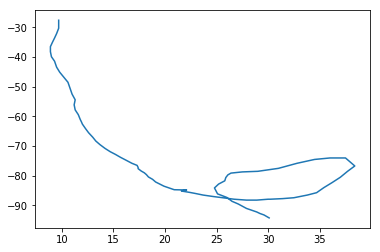

atlantic-2011-katia


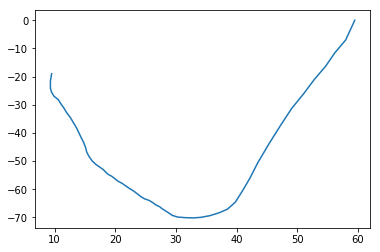

e_pacific-1997-guillermo


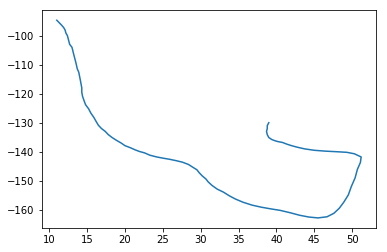

atlantic-1998-mitch


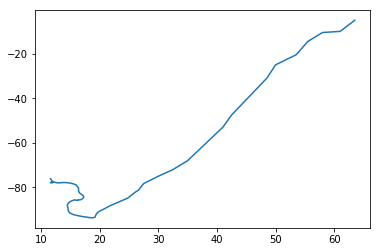

atlantic-1995-felix


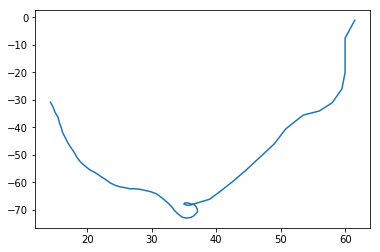

In [130]:
print('TRAJECTORY OF TOP FIVE LONGEST HURRICANES')
for w in list1 :
    la = []
    lo = []
    for i in range(len(df)) :
        if(df['NAME'][i] == w) :
            la.append(df['LATITUDE'][i])
            lo.append(df['LONGITUDE'][i])
    print(w)
    plt.plot(la,lo)
    plt.show()

TRAJECTORY OF TOP FIVE SHORTEST HURRICANES
atlantic-2017-six


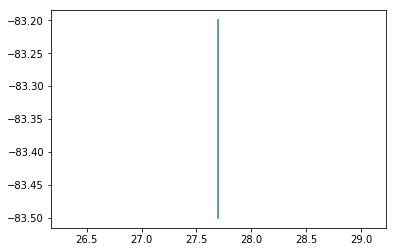

e_pacific-1959-12


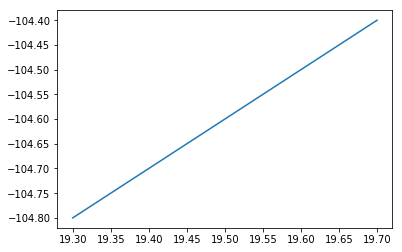

atlantic-1959-debra


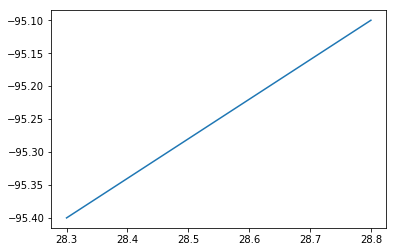

e_pacific-2014-elida


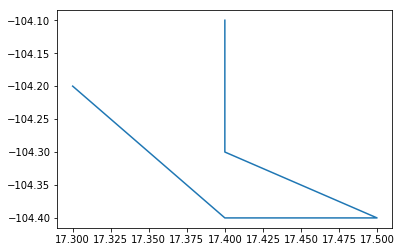

atlantic-1959-arlene


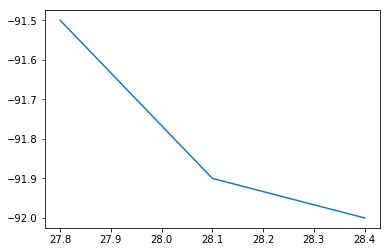

In [131]:
print('TRAJECTORY OF TOP FIVE SHORTEST HURRICANES')
for w in list2 :
    la = []
    lo = []
    for i in range(len(df)) :
        if(df['NAME'][i] == w) :
            la.append(df['LATITUDE'][i])
            lo.append(df['LONGITUDE'][i])
    print(w)
    plt.plot(la,lo)
    plt.show()

In [132]:
df.describe()

,LATITUDE,LONGITUDE,WIND SPEED,PRESSURE,DISTANCE,DIRECTION
count,36144.000000,36144.000000,36144.000000,36144.000000,36144.000000,36144.000000
mean,22.070775,-39.701433,51.197377,992.367419,74.600901,169.866209
std,9.295640,94.885876,28.079471,107.977492,69.562502,112.061624
min,1.300000,-180.000000,10.000000,879.000000,0.000000,0.000000
25%,15.300000,-108.000000,30.000000,983.000000,39.852789,68.057302
50%,19.700000,-70.900000,45.000000,999.000000,63.449125,175.359787
75%,27.600000,-33.000000,65.000000,1006.000000,91.176829,260.206539
max,69.000000,179.900000,175.000000,9999.000000,2032.990320,359.976595


In [133]:
df.head()

,LATITUDE,LONGITUDE,TIME,WIND SPEED,PRESSURE,STATUS,NAME,DISTANCE,DIRECTION
0,12.2,-28.9,08/13/06Z,30,1006,TROPICAL DEPRESSION,atlantic-2007-dean,0.000000,0.000000
1,12.1,-30.7,08/13/12Z,30,1005,TROPICAL DEPRESSION,atlantic-2007-dean,121.778232,256.672702
2,12.0,-32.4,08/13/18Z,30,1005,TROPICAL DEPRESSION,atlantic-2007-dean,115.078112,245.146827
3,11.9,-34.5,08/14/00Z,30,1005,TROPICAL DEPRESSION,atlantic-2007-dean,142.119450,311.213457
4,11.8,-36.5,08/14/06Z,30,1005,TROPICAL DEPRESSION,atlantic-2007-dean,135.417954,272.399960


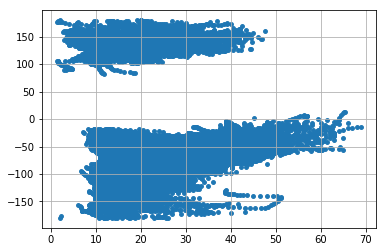

In [134]:
plt.scatter(df['LATITUDE'],df['LONGITUDE'],s=15)
plt.grid()
plt.show()

In [135]:
month = []
day = []
hour = []
def time_separator(i) :
    time = df.loc[i][2].split('/')
    month.append(time[0])
    day.append(time[1])
    hour.append(time[2])
    return month, day, hour
for i in range(len(df)) :
    month, day, hour = time_separator(i)
    hour[i] = hour[i][0:2]

In [136]:
df.insert(loc = 0, column = 'MONTH', value = month)
df.insert(loc = 1, column = 'DAY', value = day)
df.insert(loc = 2, column = 'HOUR', value = hour)
df.insert(loc =11, column = 'GRID', value = np.zeros((36144)))

In [137]:
df['GRID'] = round(abs(df['LATITUDE']) + abs(df['LONGITUDE']))

In [138]:
df.head()

,MONTH,DAY,HOUR,LATITUDE,LONGITUDE,TIME,WIND SPEED,PRESSURE,STATUS,NAME,DISTANCE,GRID,DIRECTION
0,08,13,06,12.2,-28.9,08/13/06Z,30,1006,TROPICAL DEPRESSION,atlantic-2007-dean,0.000000,41.0,0.000000
1,08,13,12,12.1,-30.7,08/13/12Z,30,1005,TROPICAL DEPRESSION,atlantic-2007-dean,121.778232,43.0,256.672702
2,08,13,18,12.0,-32.4,08/13/18Z,30,1005,TROPICAL DEPRESSION,atlantic-2007-dean,115.078112,44.0,245.146827
3,08,14,00,11.9,-34.5,08/14/00Z,30,1005,TROPICAL DEPRESSION,atlantic-2007-dean,142.119450,46.0,311.213457
4,08,14,06,11.8,-36.5,08/14/06Z,30,1005,TROPICAL DEPRESSION,atlantic-2007-dean,135.417954,48.0,272.399960


In [139]:
df.to_csv('dataset.csv')
df.describe()

,LATITUDE,LONGITUDE,WIND SPEED,PRESSURE,DISTANCE,GRID,DIRECTION
count,36144.000000,36144.000000,36144.000000,36144.000000,36144.000000,36144.000000,36144.000000
mean,22.070775,-39.701433,51.197377,992.367419,74.600901,118.255229,169.866209
std,9.295640,94.885876,28.079471,107.977492,69.562502,33.647364,112.061624
min,1.300000,-180.000000,10.000000,879.000000,0.000000,26.000000,0.000000
25%,15.300000,-108.000000,30.000000,983.000000,39.852789,95.000000,68.057302
50%,19.700000,-70.900000,45.000000,999.000000,63.449125,121.000000,175.359787
75%,27.600000,-33.000000,65.000000,1006.000000,91.176829,143.000000,260.206539
max,69.000000,179.900000,175.000000,9999.000000,2032.990320,216.000000,359.976595


36.608882521489974
Number of unique hurricanes =  698


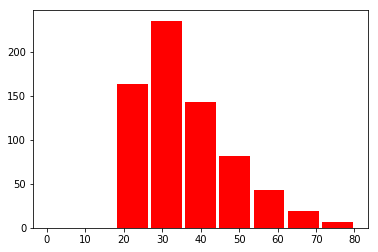

25553


,0
count,698.000000
mean,36.608883
std,12.729400
min,22.000000
25%,27.000000
50%,33.000000
75%,43.000000
max,98.000000


In [140]:
df1 = df[:]
df1 = (df1[df1['DISTANCE'] > 0]).reset_index(drop = True)
df1 = (df1[df1['DIRECTION'] > 0]).reset_index(drop = True)
num = []
def number_points(hurricane_name) :
    amount = []
    amount += [1 for w in df1['NAME'] if(w == hurricane_name)]
    return len(amount)
for w in unique_hurricanes :
    flag = 0
    if(number_points(w) < 22) :
        df1 = df1[df1['NAME'] != w]
        flag = 1
    if(flag == 0) :
        num.append(number_points(w))

print(np.mean(num))        
        
df1.reset_index(drop = True, inplace = True)

print('Number of unique hurricanes = ',len(df1['NAME'].unique()))
bins = np.linspace(0,80, num = 10)
plt.hist(num, bins, color = 'r', rwidth = 0.9)
plt.show()
print(len(df1))
num_df = pd.DataFrame(num)
num_df.describe()

In [141]:
df1.drop(['LATITUDE', 'LONGITUDE', 'MONTH', 'DAY', 'HOUR', 'TIME', 'STATUS', 'NAME'], axis = 1, inplace = True)

In [142]:
df2 = df1[:]
df2['WIND SPEED'] = df2['WIND SPEED'] / 165.000000
df2['PRESSURE'] = df2['PRESSURE'] / 1024.000000
df2['DISTANCE'] = df2['DISTANCE'] / 1563.869643
df2['GRID'] = df2['GRID'] / 216.000000
df2['DIRECTION'] = df2['DIRECTION'] / 359.976595
df2.head()

,WIND SPEED,PRESSURE,DISTANCE,GRID,DIRECTION
0,0.181818,0.981445,0.077870,0.199074,0.713026
1,0.181818,0.981445,0.073585,0.203704,0.681008
2,0.181818,0.981445,0.090877,0.212963,0.864538
3,0.181818,0.981445,0.086592,0.222222,0.756716
4,0.212121,0.980469,0.077845,0.231481,0.629351


In [205]:
df2 = np.array(df2)
timestep = 30
X_train = []
y_train = []
X_test = []
y_test = []
train = df2[0:round(len(df2)*0.8)]
test = df2[round(len(df1)*0.8) :]
for i in range(len(train) - timestep + 1) :
    X_train.append(train[i:i+timestep-1])
    y_train.append(train[i+timestep-1][4])
for i in range(len(test) - timestep + 1) :
    X_test.append(test[i:i+timestep-1])
    y_test.append(test[i+timestep-1][4])
X_train = np.reshape(X_train, (20413, 29, 5))
y_train = np.array(y_train)
X_test = np.reshape(X_test, (5082, 29, 5))
y_test = np.array(y_test)

In [145]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20413, 29, 5)
(20413,)
(5082, 29, 5)
(5082,)


In [146]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LSTM

In [178]:
model = Sequential()

model.add(LSTM(units = 128,batch_input_shape = (None,X_train.shape[1],X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 128, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 128))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('relu'))

model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X_train, y_train, batch_size=512, epochs=100, validation_split = 0.1)

Train on 18371 samples, validate on 2042 samples
Epoch 1/100
18371/18371 [==============================] - 27s 1ms/step - loss: 0.1083 - acc: 0.0000e+00 - val_loss: 0.0899 - val_acc: 0.0000e+00
Epoch 2/100
18371/18371 [==============================] - 21s 1ms/step - loss: 0.0889 - acc: 5.4434e-05 - val_loss: 0.0907 - val_acc: 0.0000e+00
Epoch 3/100
18371/18371 [==============================] - 22s 1ms/step - loss: 0.0878 - acc: 0.0000e+00 - val_loss: 0.0885 - val_acc: 0.0000e+00
Epoch 4/100
18371/18371 [==============================] - 21s 1ms/step - loss: 0.0854 - acc: 5.4434e-05 - val_loss: 0.0852 - val_acc: 0.0000e+00
Epoch 5/100
18371/18371 [==============================] - 21s 1ms/step - loss: 0.0790 - acc: 5.4434e-05 - val_loss: 0.0753 - val_acc: 0.0000e+00
Epoch 6/100
18371/18371 [==============================] - 21s 1ms/step - loss: 0.0711 - acc: 5.4434e-05 - val_loss: 0.0699 - val_acc: 0.0000e+00
Epoch 7/100
18371/18371 [==============================] - 21s 1ms/step - l

18371/18371 [==============================] - 21s 1ms/step - loss: 0.0602 - acc: 5.4434e-05 - val_loss: 0.0627 - val_acc: 0.0000e+00
Epoch 57/100
18371/18371 [==============================] - 21s 1ms/step - loss: 0.0593 - acc: 5.4434e-05 - val_loss: 0.0621 - val_acc: 0.0000e+00
Epoch 58/100
18371/18371 [==============================] - 21s 1ms/step - loss: 0.0590 - acc: 5.4434e-05 - val_loss: 0.0618 - val_acc: 0.0000e+00
Epoch 59/100
18371/18371 [==============================] - 21s 1ms/step - loss: 0.0589 - acc: 5.4434e-05 - val_loss: 0.0619 - val_acc: 0.0000e+00
Epoch 60/100
18371/18371 [==============================] - 21s 1ms/step - loss: 0.0586 - acc: 5.4434e-05 - val_loss: 0.0614 - val_acc: 0.0000e+00
Epoch 61/100
18371/18371 [==============================] - 21s 1ms/step - loss: 0.0588 - acc: 5.4434e-05 - val_loss: 0.0616 - val_acc: 0.0000e+00
Epoch 62/100
18371/18371 [==============================] - 21s 1ms/step - loss: 0.0583 - acc: 5.4434e-05 - val_loss: 0.0614 - val_

In [179]:
from keras.models import load_model
model.save('my_model.h5')

In [180]:
t1 = model.evaluate(X_test, y_test, verbose=1)

5082/5082 [==============================] - 2s 450us/step


In [191]:
p1 = model.predict(X_test, batch_size = 64, verbose = 1)

5082/5082 [==============================] - 2s 353us/step


In [210]:
p2 = model.predict(X_train, batch_size = 64, verbose = 1)

20413/20413 [==============================] - 8s 375us/step


In [237]:
y_test_temp = np.reshape(y_test, (5082,1))
error = abs(y_test_temp - p1)
error = v*100

In [240]:
error1 = pd.DataFrame(error)
error1.describe()

,0
count,5082.000000
mean,17.128962
std,17.072329
min,0.002090
25%,4.553840
50%,11.370116
75%,23.851607
max,91.715679
